In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 2:
                selectivity_average = ast.literal_eval(line)
            if i == 3:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [5]:
def all_plotter(test_prop1, sparsity_prop1, selectivity_prop1, 
                test_single, sparsity_single, selectivity_single, test_combine, 
                sparsity_combine, selectivity_combine,
                base):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    
    ax1.plot(np.linspace(0.0, 30.0, num=30), test_prop1, label=f'accuracy {base}', c='royalblue')
    ax1.plot(np.linspace(0.0, 30.0, num=30), sparsity_prop1, label=f'sparsity {base}', c='cornflowerblue')
    ax1.plot(np.linspace(0.0, 30.0, num=30), selectivity_prop1, label=f'selectivity {base}', c='lightsteelblue')
    
    ax1.plot(np.linspace(0.0, 30.0, num=30), test_single, label='accuracy single', c='indigo')
    ax1.plot(np.linspace(0.0, 30.0, num=30), sparsity_single, label='sparsity single', c='darkorchid')
    ax1.plot(np.linspace(0.0, 30.0, num=30), selectivity_single, label='selectivity single', c='violet')
    
    ax1.plot(np.linspace(0.0, 30.0, num=30), test_combine, label='accuracy combined', c='darkgoldenrod')
    ax1.plot(np.linspace(0.0, 30.0, num=30), sparsity_combine, label='sparsity combined', c='goldenrod')
    ax1.plot(np.linspace(0.0, 30.0, num=30), selectivity_combine, label='selectivity combined', c='gold')
    
    ax1.set_ylim([0,1.0])
    ax1.grid()
    ax1.legend(loc='lower left')
    ax1.set_title('Accuracy, Sparsity, and Selectivity')
    
    
    ax2.plot(np.linspace(0.0, 30.0, num=30), 
             [a * b for a, b in zip(test_prop1, sparsity_prop1)], 
             label=f'{base}: accuracy x sparsity', c='deepskyblue')
    ax2.plot(np.linspace(0.0, 30.0, num=30), 
             [a * b for a, b in zip(test_prop1, selectivity_prop1)], 
             label=f'{base}: accuracy x sparsity', c='skyblue')
    
    ax2.plot(np.linspace(0.0, 30.0, num=30), 
             [a * b for a, b in zip(test_single, sparsity_single)], 
             label=f'single: accuracy x sparsity', c='magenta')
    ax2.plot(np.linspace(0.0, 30.0, num=30), 
             [a * b for a, b in zip(test_single, selectivity_single)], 
             label=f'single: accuracy x sparsity', c='orchid')
    
    ax2.plot(np.linspace(0.0, 30.0, num=30), 
             [a * b for a, b in zip(test_combine, sparsity_combine)], 
             label=f'combined: accuracy x sparsity', c='tomato')
    ax2.plot(np.linspace(0.0, 30.0, num=30), 
             [a * b for a, b in zip(test_combine, selectivity_combine)], 
             label=f'combined: accuracy x sparsity', c='salmon')
    
    ax2.set_ylim([0,1.0])
    ax2.grid()
    ax2.legend(loc='lower left')
    ax2.set_title('Accuracy x Sparsity (or Selectivity)')
    
    
    plt.show()

# Extract Values

## single

In [6]:
Adadelta_single_test = test_val_extractor('single/sparsity_selectivity_4_optim_single_Adadelta.txt')
Adagrad_single_test = test_val_extractor('single/sparsity_selectivity_4_optim_single_Adagrad.txt')

In [7]:
Adadelta_single_sparsity = sparsity_val_extractor('single/sparsity_selectivity_4_optim_single_Adadelta.txt')
Adagrad_single_sparsity = sparsity_val_extractor('single/sparsity_selectivity_4_optim_single_Adagrad.txt')

In [8]:
Adadelta_single_selectivity_avg, Adadelta_single_selectivity_std = selectivity_val_extractor('single/sparsity_selectivity_4_optim_single_Adadelta.txt')
Adagrad_single_selectivity_avg, Adagrad_single_selectivity_std = selectivity_val_extractor('single/sparsity_selectivity_4_optim_single_Adagrad.txt')

## hyper

In [9]:
Adadelta_hyper_test = test_val_extractor('new_hyper/sparsity_selectivity_hyper_Adadelta.txt')
SGD_hyper_test = test_val_extractor('new_hyper/sparsity_selectivity_hyper_SGD.txt')

Adadelta_hyper_sparsity = sparsity_val_extractor('new_hyper/sparsity_selectivity_hyper_Adadelta.txt')
SGD_hyper_sparsity = sparsity_val_extractor('new_hyper/sparsity_selectivity_hyper_SGD.txt')

Adadelta_hyper_selectivity_avg, Adadelta_hyper_selectivity_std = selectivity_val_extractor('new_hyper/sparsity_selectivity_hyper_Adadelta.txt')
SGD_hyper_selectivity_avg, SGD_hyper_selectivity_std = selectivity_val_extractor('new_hyper/sparsity_selectivity_hyper_SGD.txt')

In [17]:
rho1_Adadelta_hyper_test = test_val_extractor('new_hyper/rho1_sparsity_selectivity_hyper_Adadelta.txt')
rho1_Adadelta_hyper_sparsity = sparsity_val_extractor('new_hyper/rho1_sparsity_selectivity_hyper_Adadelta.txt')
rho1_Adadelta_hyper_selectivity_avg, Adadelta_hyper_selectivity_std = selectivity_val_extractor('new_hyper/rho1_sparsity_selectivity_hyper_Adadelta.txt')

# Neurons

In [10]:
Adagrad_neurons_test = test_val_extractor('new_neurons/sparsity_selectivity_neurons_Adagrad.txt')
Adam_neurons_test = test_val_extractor('new_neurons/sparsity_selectivity_neurons_Adam.txt')

Adagrad_neurons_sparsity = sparsity_val_extractor('new_neurons/sparsity_selectivity_neurons_Adagrad.txt')
Adam_neurons_sparsity = sparsity_val_extractor('new_neurons/sparsity_selectivity_neurons_Adam.txt')

Adagrad_neurons_selectivity_avg, Adagrad_neurons_selectivity_std = selectivity_val_extractor('new_neurons/sparsity_selectivity_neurons_Adagrad.txt')
Adam_neurons_selectivity_avg, Adam_neurons_selectivity_std = selectivity_val_extractor('new_neurons/sparsity_selectivity_neurons_Adam.txt')

# batch size

In [11]:
SGD_bs1_test = test_val_extractor('batch1/sparsity_selectivity_batchsize_1_50_SGD.txt')
Adam_bs1_test = test_val_extractor('batch1/sparsity_selectivity_batchsize_1_50_Adam.txt')

SGD_bs1_sparsity = sparsity_val_extractor('batch1/sparsity_selectivity_batchsize_1_50_SGD.txt')
Adam_bs1_sparsity = sparsity_val_extractor('batch1/sparsity_selectivity_batchsize_1_50_Adam.txt')

SGD_bs1_selectivity_avg, SGD_bs1_selectivity_std = selectivity_val_extractor('batch1/sparsity_selectivity_batchsize_1_50_SGD.txt')
Adam_bs1_selectivity_avg, Adam_bs_selectivity_std = selectivity_val_extractor('batch1/sparsity_selectivity_batchsize_1_50_Adam.txt')

## combined

In [12]:
Adadelta_combined_test = test_val_extractor('combined/combine_sparsity_selectivity_Adadelta.txt')
Adagrad_combined_test = test_val_extractor('combined/combine_sparsity_selectivity_Adagrad.txt')
Adam_combined_test = test_val_extractor('combined/combine_sparsity_selectivity_Adam.txt')
SGD_combined_test = test_val_extractor('combined/combine_sparsity_selectivity_SGD.txt')

In [13]:
Adadelta_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_selectivity_Adadelta.txt')
Adagrad_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_selectivity_Adagrad.txt')
Adam_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_selectivity_Adam.txt')
SGD_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_selectivity_SGD.txt')

In [14]:
Adadelta_combined_selectivity_avg, Adadelta_combined_selectivity_std = selectivity_val_extractor('combined/combine_sparsity_selectivity_Adadelta.txt')
Adagrad_combined_selectivity_avg, Adagrad_combined_selectivity_std = selectivity_val_extractor('combined/combine_sparsity_selectivity_Adagrad.txt')
Adam_combined_selectivity_avg, Adam_combined_selectivity_std = selectivity_val_extractor('combined/combine_sparsity_selectivity_Adam.txt')
SGD_combined_selectivity_avg, SGD_combined_selectivity_std = selectivity_val_extractor('combined/combine_sparsity_selectivity_SGD.txt')

In [18]:
rho1_Adadelta_combined_test = test_val_extractor('combined/rho1_combine_sparsity_selectivity_Adadelta.txt')
rho1_Adadelta_combined_sparsity = sparsity_val_extractor('combined/rho1_combine_sparsity_selectivity_Adadelta.txt')
rho1_Adadelta_combined_selectivity_avg, rho1_Adadelta_combined_selectivity_std = selectivity_val_extractor('combined/rho1_combine_sparsity_selectivity_Adadelta.txt')

# Combined model vs base line model

## Combined Models
### SGD
hyper_parameter, momentum=0.9 + batch size 1
### Adadelta
hyper_parameter, rho=1.0 + single digit in a batch
### Adagrad
1024 neurons + single digit in a batch
### Adam
1024 neurons + batch size 1

## Baseline Models
### SGD
hyper_parameter, momentum=0.9 AND batch size 1
### Adadelta
hyper_parameter, rho=1.0 AND single digit in a batch 
### Agagrad
1024 neurons AND single digit in a batch
### Adam
1024 neurons AND batch size 1

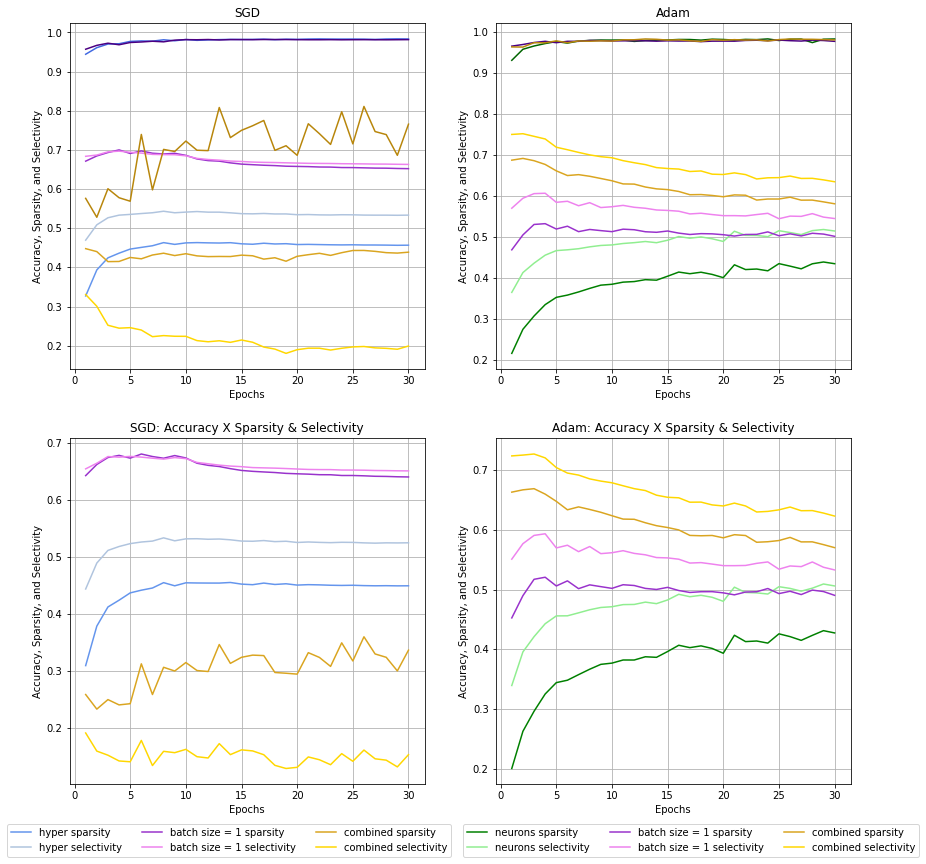

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

# SGD = hyper (momentum=0.9) + bs1 
ax1.plot(np.linspace(1, 30, 30), SGD_hyper_test, label='hyper accuracy', color='royalblue')
ax1.plot(np.linspace(1, 30, 30), SGD_hyper_sparsity, label='hyper sparsity', color='cornflowerblue')
ax1.plot(np.linspace(1, 30, 30), SGD_hyper_selectivity_avg, label='hyper selectivity', color='lightsteelblue')

ax1.plot(np.linspace(1, 30, 30), SGD_bs1_test, label='batch size = 1 accuracy', color='indigo')
ax1.plot(np.linspace(1, 30, 30), SGD_bs1_sparsity, label='batch size = 1 sparsity', color='darkorchid')
ax1.plot(np.linspace(1, 30, 30), SGD_bs1_selectivity_avg, label='batch size = 1 selectivity', color='violet')

ax1.plot(np.linspace(1, 30, 30), SGD_combined_test, label='combined accuracy', color='darkgoldenrod')
ax1.plot(np.linspace(1, 30, 30), SGD_combined_sparsity, label='combined sparsity', color='goldenrod')
ax1.plot(np.linspace(1, 30, 30), SGD_combined_selectivity_avg, label='combined selectivity', color='gold')

ax1.grid()
ax1.set_title('SGD')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy, Sparsity, and Selectivity')
ax1.plot()

# Adam = neurons + bs1
ax2.plot(np.linspace(1, 30, 30), Adam_neurons_test, label='neurons accuracy', color='darkgreen')
ax2.plot(np.linspace(1, 30, 30), Adam_neurons_sparsity, label='neurons sparsity', color='green')
ax2.plot(np.linspace(1, 30, 30), Adam_neurons_selectivity_avg, label='neurons selectivity', color='lightgreen')

ax2.plot(np.linspace(1, 30, 30), Adam_bs1_test, label='batch size = 1 accuracy', color='indigo')
ax2.plot(np.linspace(1, 30, 30), Adam_bs1_sparsity, label='batch size = 1 sparsity', color='darkorchid')
ax2.plot(np.linspace(1, 30, 30), Adam_bs1_selectivity_avg, label='batch size = 1 selectivity', color='violet')

ax2.plot(np.linspace(1, 30, 30), Adam_combined_test, label='combined accuracy', color='darkgoldenrod')
ax2.plot(np.linspace(1, 30, 30), Adam_combined_sparsity, label='combined sparsity', color='goldenrod')
ax2.plot(np.linspace(1, 30, 30), Adam_combined_selectivity_avg, label='combined selectivity', color='gold')

ax2.grid()
ax2.set_title('Adam')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy, Sparsity, and Selectivity')
ax2.plot()

# SGD = hyper (momentum=0.9) + bs1 
ax3.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(SGD_hyper_test, SGD_hyper_sparsity)], label='hyper sparsity', color='cornflowerblue')
ax3.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(SGD_hyper_test, SGD_hyper_selectivity_avg)], label='hyper selectivity', color='lightsteelblue')

ax3.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(SGD_bs1_test, SGD_bs1_sparsity)], label='batch size = 1 sparsity', color='darkorchid')
ax3.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(SGD_bs1_test, SGD_bs1_selectivity_avg)], label='batch size = 1 selectivity', color='violet')

ax3.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(SGD_combined_test, SGD_combined_sparsity)], label='combined sparsity', color='goldenrod')
ax3.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(SGD_combined_test, SGD_combined_selectivity_avg)], label='combined selectivity', color='gold')

ax3.grid()
ax3.set_title('SGD: Accuracy X Sparsity & Selectivity')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy, Sparsity, and Selectivity')
ax3.plot()

ax3.legend(loc='upper center', bbox_to_anchor=(0.45, -0.1),
          ncol=3)

# Adam = neurons + bs1
ax4.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_neurons_test, Adam_neurons_sparsity)], label='neurons sparsity', color='green')
ax4.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_neurons_test, Adam_neurons_selectivity_avg)], label='neurons selectivity', color='lightgreen')

ax4.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_bs1_test, Adam_bs1_sparsity)], label='batch size = 1 sparsity', color='darkorchid')
ax4.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_bs1_test, Adam_bs1_selectivity_avg)], label='batch size = 1 selectivity', color='violet')

ax4.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_combined_test, Adam_combined_sparsity)], label='combined sparsity', color='goldenrod')
ax4.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_combined_test, Adam_combined_selectivity_avg)], label='combined selectivity', color='gold')

ax4.grid()
ax4.set_title('Adam: Accuracy X Sparsity & Selectivity')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Accuracy, Sparsity, and Selectivity')
ax4.plot()

ax4.legend(loc='upper center', bbox_to_anchor=(0.55, -0.1),
           ncol=3)

# SGD

In [ ]:
all_plotter(SGD_hyper_test, SGD_hyper_sparsity, SGD_hyper_selectivity_avg, 
            SGD_bs1_test, SGD_bs1_sparsity, SGD_bs1_selectivity_avg, 
            SGD_combined_test, SGD_combined_sparsity, SGD_combined_selectivity_avg, 'momentum=0.9')

# Adadelta

In [ ]:
all_plotter(Adadelta_hyper_test, Adadelta_hyper_sparsity, Adadelta_hyper_selectivity_avg, 
            Adadelta_single_test, Adadelta_single_sparsity, Adadelta_single_selectivity_avg, 
            Adadelta_combined_test, Adadelta_combined_sparsity, Adadelta_combined_selectivity_avg, 'rho=1.0')

# Adagrad

In [ ]:
all_plotter(Adagrad_neurons_test, Adagrad_neurons_sparsity, Adagrad_neurons_selectivity_avg, 
            Adagrad_single_test, Adagrad_single_sparsity, Adagrad_single_selectivity_avg, 
            Adagrad_combined_test, Adagrad_combined_sparsity, Adagrad_combined_selectivity_avg, '1024 neurons')

# Adam

In [ ]:
all_plotter(Adam_neurons_test, Adam_neurons_sparsity, Adam_neurons_selectivity_avg, 
            Adam_bs_test, Adam_bs_sparsity, Adam_bs_selectivity_avg, 
            Adam_combined_test, Adam_combined_sparsity, Adam_combined_selectivity_avg, '1024 neurons')

In [ ]:
# SGD

In [ ]:
print("< Compare with hyper >")

print("test combined vs hyper:", SGD_combined_test[-1] - SGD_hyper_test[-1])
print("sparsity combined vs hyper:", SGD_combined_sparsity[-1] - SGD_hyper_sparsity[-1])
print("selectivity avg combined vs hyper:", SGD_combined_selectivity_avg[-1] - SGD_hyper_selectivity_avg[-1])
print("selectivity std combined vs hyper:", SGD_combined_selectivity_std[-1] - SGD_hyper_selectivity_std[-1])
print()

print("test combined vs hyper:", (SGD_combined_test[-1] / SGD_hyper_test[-1]) * 100)
print("sparsity combined vs hyper:", (SGD_combined_sparsity[-1] / SGD_hyper_sparsity[-1])* 100)
print("selectivity avg combined vs hyper:", (SGD_combined_selectivity_avg[-1] / SGD_hyper_selectivity_avg[-1])* 100)
print("selectivity std combined vs hyper:", (SGD_combined_selectivity_std[-1] / SGD_hyper_selectivity_std[-1])* 100)
print()

print("< Compare with single >")

print("test combined vs single:", SGD_combined_test[-1] - SGD_single_test[-1])
print("sparsity combined vs single:", SGD_combined_sparsity[-1] - SGD_single_sparsity[-1])
print("selectivity avg combined vs single:", SGD_combined_selectivity_avg[-1] - SGD_single_selectivity_avg[-1])
print("selectivity std combined vs single:", SGD_combined_selectivity_std[-1] - SGD_single_selectivity_std[-1])
print()
print("test combined vs single:", (SGD_combined_test[-1] / SGD_single_test[-1])*100)
print("sparsity combined vs single:", (SGD_combined_sparsity[-1] / SGD_single_sparsity[-1])*100)
print("selectivity avg combined vs single:", (SGD_combined_selectivity_avg[-1] / SGD_single_selectivity_avg[-1])*100)
print("selectivity std combined vs single:", (SGD_combined_selectivity_std[-1] / SGD_single_selectivity_std[-1])*100)

In [ ]:
# Adadelta

In [ ]:
print("< Compare with hyper >")

print("test combined vs hyper:", Adadelta_combined_test[-1] - Adadelta_hyper_test[-1])
print("sparsity combined vs hyper:", Adadelta_combined_sparsity[-1] - Adadelta_hyper_sparsity[-1])
print("selectivity avg combined vs hyper:", Adadelta_combined_selectivity_avg[-1] - Adadelta_hyper_selectivity_avg[-1])
print("selectivity std combined vs hyper:", Adadelta_combined_selectivity_std[-1] - Adadelta_hyper_selectivity_std[-1])
print()

print("test combined vs hyper:", (Adadelta_combined_test[-1] / Adadelta_hyper_test[-1]) * 100)
print("sparsity combined vs hyper:", (Adadelta_combined_sparsity[-1] / Adadelta_hyper_sparsity[-1])* 100)
print("selectivity avg combined vs hyper:", (Adadelta_combined_selectivity_avg[-1] / Adadelta_hyper_selectivity_avg[-1])* 100)
print("selectivity std combined vs hyper:", (Adadelta_combined_selectivity_std[-1] / Adadelta_hyper_selectivity_std[-1])* 100)
print()

print("< Compare with single >")

print("test combined vs single:", Adadelta_combined_test[-1] - Adadelta_single_test[-1])
print("sparsity combined vs single:", Adadelta_combined_sparsity[-1] - Adadelta_single_sparsity[-1])
print("selectivity avg combined vs single:", Adadelta_combined_selectivity_avg[-1] - Adadelta_single_selectivity_avg[-1])
print("selectivity std combined vs single:", Adadelta_combined_selectivity_std[-1] - Adadelta_single_selectivity_std[-1])
print()
print("test combined vs single:", (Adadelta_combined_test[-1] / Adadelta_single_test[-1])*100)
print("sparsity combined vs single:", (Adadelta_combined_sparsity[-1] / Adadelta_single_sparsity[-1])*100)
print("selectivity avg combined vs single:", (Adadelta_combined_selectivity_avg[-1] / Adadelta_single_selectivity_avg[-1])*100)
print("selectivity std combined vs single:", (Adadelta_combined_selectivity_std[-1] / Adadelta_single_selectivity_std[-1])*100)

In [ ]:
# Adagrad

In [ ]:
print("< Compare with Neurons >")
print("test combined vs neurons:", Adagrad_combined_test[-1] - Adagrad_neurons_test[-1])
print("sparsity combined vs neurons:", Adagrad_combined_sparsity[-1] - Adagrad_neurons_sparsity[-1])
print("selectivity avg combined vs neurons:", Adagrad_combined_selectivity_avg[-1] - Adagrad_neurons_selectivity_avg[-1])
print("selectivity std combined vs neurons:", Adagrad_combined_selectivity_std[-1] - Adagrad_neurons_selectivity_std[-1])
print()

print("test combined vs neurons:", (Adagrad_combined_test[-1] / Adagrad_neurons_test[-1]) * 100)
print("sparsity combined vs neurons:", (Adagrad_combined_sparsity[-1] / Adagrad_neurons_sparsity[-1])* 100)
print("selectivity avg combined vs neurons:", (Adagrad_combined_selectivity_avg[-1] / Adagrad_neurons_selectivity_avg[-1])* 100)
print("selectivity std combined vs neurons:", (Adagrad_combined_selectivity_std[-1] / Adagrad_neurons_selectivity_std[-1])* 100)
print()

print("< Compare with single >")
print("test combined vs single:", Adagrad_combined_test[-1] - Adagrad_single_test[-1])
print("sparsity combined vs single:", Adagrad_combined_sparsity[-1] - Adagrad_single_sparsity[-1])
print("selectivity avg combined vs single:", Adagrad_combined_selectivity_avg[-1] - Adagrad_single_selectivity_avg[-1])
print("selectivity std combined vs single:", Adagrad_combined_selectivity_std[-1] - Adagrad_single_selectivity_std[-1])
print()
print("test combined vs single:", (Adagrad_combined_test[-1] / Adagrad_single_test[-1])*100)
print("sparsity combined vs single:", (Adagrad_combined_sparsity[-1] / Adagrad_single_sparsity[-1])*100)
print("selectivity avg combined vs single:", (Adagrad_combined_selectivity_avg[-1] / Adagrad_single_selectivity_avg[-1])*100)
print("selectivity std combined vs single:", (Adagrad_combined_selectivity_std[-1] / Adagrad_single_selectivity_std[-1])*100)

In [ ]:
# Adam

In [ ]:
print("< Compare with Neurons >")
print("test combined vs neurons:", Adam_combined_test[-1] - Adam_neurons_test[-1])
print("sparsity combined vs neurons:", Adam_combined_sparsity[-1] - Adagrad_neurons_sparsity[-1])
print("selectivity avg combined vs neurons:", Adam_combined_selectivity_avg[-1] - Adam_neurons_selectivity_avg[-1])
print("selectivity std combined vs neurons:", Adam_combined_selectivity_std[-1] - Adam_neurons_selectivity_std[-1])
print()

print("test combined vs neurons:", (Adam_combined_test[-1] / Adam_neurons_test[-1]) * 100)
print("sparsity combined vs neurons:", (Adam_combined_sparsity[-1] / Adam_neurons_sparsity[-1])* 100)
print("selectivity avg combined vs neurons:", (Adam_combined_selectivity_avg[-1] / Adam_neurons_selectivity_avg[-1])* 100)
print("selectivity std combined vs neurons:", (Adam_combined_selectivity_std[-1] / Adam_neurons_selectivity_std[-1])* 100)
print()

print("< Compare with single >")
print("test combined vs single:", Adam_combined_test[-1] - Adam_single_test[-1])
print("sparsity combined vs single:", Adam_combined_sparsity[-1] - Adam_single_sparsity[-1])
print("selectivity avg combined vs single:", Adam_combined_selectivity_avg[-1] - Adam_single_selectivity_avg[-1])
print("selectivity std combined vs single:", Adam_combined_selectivity_std[-1] - Adam_single_selectivity_std[-1])
print()
print("test combined vs single:", (Adam_combined_test[-1] / Adam_single_test[-1])*100)
print("sparsity combined vs single:", (Adam_combined_sparsity[-1] / Adam_single_sparsity[-1])*100)
print("selectivity avg combined vs single:", (Adam_combined_selectivity_avg[-1] / Adam_single_selectivity_avg[-1])*100)
print("selectivity std combined vs single:", (Adam_combined_selectivity_std[-1] / Adam_single_selectivity_std[-1])*100)